專題:情感分析(sentiment analysis)


---


使用技術:深度深度(Deep Learning)/自然語言處理(Natural Language Processing)

---
資料來源:https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews


---
IMDB 數據集包含用於自然語言處理或文本分析的 50K 電影評論。
這是一個用於二元情感分類的數據集，使用深度學習算法預測正面和負面評論的數量。



---


資料集(DataSet):IMDB_Dataset.csv


---


程式共有兩種版本
(1)一般作法
(2)使用 Simple Transformers 框架 


---

**以下說明(1)一般作法**


---




Seaborn 本質上是一個基於 matplotlib 庫的高級 API。它包含更適合處理圖表的默認設置。

In [1]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


詞雲又叫文字雲，是對文字資料中出現頻率較高的“關鍵詞”在視覺上的突出呈現，形成關鍵詞的渲染形成類似雲一樣的彩色圖片，從而一眼就可以領略文字資料的主要表達意思。

In [2]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Pandas 是一種常用的資料分析處理工具，主要應用於單維度(Series)與二維度(DataFrame)的資料處理。


---
Numpy 可以產生一維、二維陣列進行向量（vector）和矩陣（matrix）運算，其在大量運算時有非常優異的效能。


In [3]:
import pandas as pd
import numpy as np

In [4]:
import seaborn as sns

In [5]:
import string

NLTK 全名是 Natural Language Tool Kit， 是一套基於 Python 的自然語言處理工具箱。

In [6]:
import nltk

Matplotlib 是一個用於創建二維圖和圖形的底層庫。

In [7]:
import matplotlib.pyplot as plt

tensorflow 一個用於機器學習的開源軟體庫，可以支援深度學習的各種演算法。

In [8]:
import tensorflow as tf

Keras是一款用Python編寫而成的開源神經網路庫，也可以說是開放的高階深度學習程式庫，能搭配TensorFlow使用

In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [10]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

函式: 將資料集 IMDB_Dataset.csv 的 'positive' 改為'1', 'negative'改為 '0'

In [11]:
def Convert(data_p):
     data_p = data_p[data_p['sentiment'].isin(['positive', 'negative'])]
     data_p['sentiment'] = data_p['sentiment'].replace({'positive':1, 'negative': 0})
     return data_p

使用 pandas 讀取 DataSet(CSV格式)

In [12]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IMDB_Dataset.csv')

呼叫 Convert 函式 , 將資料集 IMDB_Dataset.csv 的 'positive' 改為'1', 'negative'改為 '0'

In [13]:
df = Convert(df)

In [14]:
df.info

<bound method DataFrame.info of                                                   review  sentiment
0      One of the other reviewers has mentioned that ...          1
1      A wonderful little production. <br /><br />The...          1
2      I thought this was a wonderful way to spend ti...          1
3      Basically there's a family where a little boy ...          0
4      Petter Mattei's "Love in the Time of Money" is...          1
...                                                  ...        ...
49995  I thought this movie did a down right good job...          1
49996  Bad plot, bad dialogue, bad acting, idiotic di...          0
49997  I am a Catholic taught in parochial elementary...          0
49998  I'm going to have to disagree with the previou...          0
49999  No one expects the Star Trek movies to be high...          0

[50000 rows x 2 columns]>

In [15]:
df


review  sentiment
0      One of the other reviewers has mentioned that ...          1
1      A wonderful little production. <br /><br />The...          1
2      I thought this was a wonderful way to spend ti...          1
3      Basically there's a family where a little boy ...          0
4      Petter Mattei's "Love in the Time of Money" is...          1
...                                                  ...        ...
49995  I thought this movie did a down right good job...          1
49996  Bad plot, bad dialogue, bad acting, idiotic di...          0
49997  I am a Catholic taught in parochial elementary...          0
49998  I'm going to have to disagree with the previou...          0
49999  No one expects the Star Trek movies to be high...          0

[50000 rows x 2 columns]

預處理

---


在進行分析之前，需要進行一些文本清理和處理。預處理和數據清洗是數據分析的重要組成部分。首先，我將“review”列設為字符串格式。它看起來像字符串。但是，如果有一些不是字符串格式的數據，我會簡單地將整列轉換為字符串。

In [16]:
df['review'] = df['review'].astype(str)

剔除該行是NULL值

In [17]:
df = df[~df["review"].isnull()]

看一下 正面1/負面0 資料分布

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


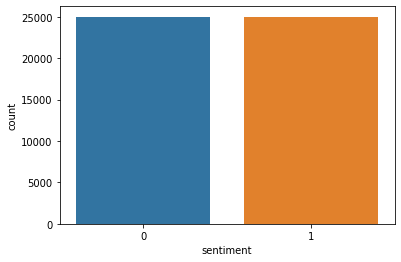

In [18]:
sns.countplot(df['sentiment'])

英文字母 大寫 轉換成 小寫

In [19]:
df['review1'] = df['review'].apply(lambda x: " ".join(x.lower() for x in x.split())) 

In [20]:
df

review  sentiment  \
0      One of the other reviewers has mentioned that ...          1   
1      A wonderful little production. <br /><br />The...          1   
2      I thought this was a wonderful way to spend ti...          1   
3      Basically there's a family where a little boy ...          0   
4      Petter Mattei's "Love in the Time of Money" is...          1   
...                                                  ...        ...   
49995  I thought this movie did a down right good job...          1   
49996  Bad plot, bad dialogue, bad acting, idiotic di...          0   
49997  I am a Catholic taught in parochial elementary...          0   
49998  I'm going to have to disagree with the previou...          0   
49999  No one expects the Star Trek movies to be high...          0   

                                                 review1  
0      one of the other reviewers has mentioned that ...  
1      a wonderful little production. <br /><br />the...  
2      i thought this was a wonderful way to spend ti...  
3      basically there's a family where a little boy ...  
4      petter mattei's "love in the time of money" is...  
...                                                  ...  
49995  i thought this movie did a down right good job...  
49996  bad plot, bad dialogue, bad acting, idiotic di...  
49997  i am a catholic taught in parochial elementary...  
49998  i'm going to have to disagree with the previou...  
49999  no one expects the star trek movies to be high...  

[50000 rows x 3 columns]

In [21]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

文本(review) 可能包含許多對任何分析都沒有幫助的特殊字符(PUNCTUATIONS)。清除之。




去除 PUNCTUATIONS 函式





In [22]:
def remove_func(message):
    Test_punc_removed = [char for char in message if char not in string .punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    
    return Test_punc_removed_join

In [23]:
df['review2'] = df['review1'].apply(remove_func)

In [24]:
df[['review','sentiment','review2']]


review  sentiment  \
0      One of the other reviewers has mentioned that ...          1   
1      A wonderful little production. <br /><br />The...          1   
2      I thought this was a wonderful way to spend ti...          1   
3      Basically there's a family where a little boy ...          0   
4      Petter Mattei's "Love in the Time of Money" is...          1   
...                                                  ...        ...   
49995  I thought this movie did a down right good job...          1   
49996  Bad plot, bad dialogue, bad acting, idiotic di...          0   
49997  I am a Catholic taught in parochial elementary...          0   
49998  I'm going to have to disagree with the previou...          0   
49999  No one expects the Star Trek movies to be high...          0   

                                                 review2  
0      one of the other reviewers has mentioned that ...  
1      a wonderful little production br br the filmin...  
2      i thought this was a wonderful way to spend ti...  
3      basically theres a family where a little boy j...  
4      petter matteis love in the time of money is a ...  
...                                                  ...  
49995  i thought this movie did a down right good job...  
49996  bad plot bad dialogue bad acting idiotic direc...  
49997  i am a catholic taught in parochial elementary...  
49998  im going to have to disagree with the previous...  
49999  no one expects the star trek movies to be high...  

[50000 rows x 3 columns]

刪除停用詞


停用詞是一些語法或具有約束力的詞，如“is”、“the”、“and”、“so”、“my”等。這些詞經常出現。但可能不會為分析增加任何價值。


In [25]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['review3'] = df['review2'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['review3'].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0    one reviewers mentioned watching 1 oz episode ...
1    wonderful little production br br filming tech...
2    thought wonderful way spend time hot summer we...
3    basically theres family little boy jake thinks...
4    petter matteis love time money visually stunni...
Name: review3, dtype: object

In [26]:
df[['review2','sentiment','review3']]

review2  sentiment  \
0      one of the other reviewers has mentioned that ...          1   
1      a wonderful little production br br the filmin...          1   
2      i thought this was a wonderful way to spend ti...          1   
3      basically theres a family where a little boy j...          0   
4      petter matteis love in the time of money is a ...          1   
...                                                  ...        ...   
49995  i thought this movie did a down right good job...          1   
49996  bad plot bad dialogue bad acting idiotic direc...          0   
49997  i am a catholic taught in parochial elementary...          0   
49998  im going to have to disagree with the previous...          0   
49999  no one expects the star trek movies to be high...          0   

                                                 review3  
0      one reviewers mentioned watching 1 oz episode ...  
1      wonderful little production br br filming tech...  
2      thought wonderful way spend time hot summer we...  
3      basically theres family little boy jake thinks...  
4      petter matteis love time money visually stunni...  
...                                                  ...  
49995  thought movie right good job wasnt creative or...  
49996  bad plot bad dialogue bad acting idiotic direc...  
49997  catholic taught parochial elementary schools n...  
49998  im going disagree previous comment side maltin...  
49999  one expects star trek movies high art fans exp...  

[50000 rows x 3 columns]

詞幹/詞條提取
`

Stemming and Lemmatization

In [27]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
df['review4'] = df['review3'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [28]:
df[['review3','sentiment','review4']]

review3  sentiment  \
0      one reviewers mentioned watching 1 oz episode ...          1   
1      wonderful little production br br filming tech...          1   
2      thought wonderful way spend time hot summer we...          1   
3      basically theres family little boy jake thinks...          0   
4      petter matteis love time money visually stunni...          1   
...                                                  ...        ...   
49995  thought movie right good job wasnt creative or...          1   
49996  bad plot bad dialogue bad acting idiotic direc...          0   
49997  catholic taught parochial elementary schools n...          0   
49998  im going disagree previous comment side maltin...          0   
49999  one expects star trek movies high art fans exp...          0   

                                                 review4  
0      one review mention watch 1 oz episod youll hoo...  
1      wonder littl product br br film techniqu unass...  
2      thought wonder way spend time hot summer weeke...  
3      basic there famili littl boy jake think there ...  
4      petter mattei love time money visual stun film...  
...                                                  ...  
49995  thought movi right good job wasnt creativ orig...  
49996  bad plot bad dialogu bad act idiot direct anno...  
49997  cathol taught parochi elementari school nun ta...  
49998  im go disagre previou comment side maltin one ...  
49999  one expect star trek movi high art fan expect ...  

[50000 rows x 3 columns]

詞雲

創建詞雲 文本組合

In [29]:
text = " ".join(review for review in df.review4)

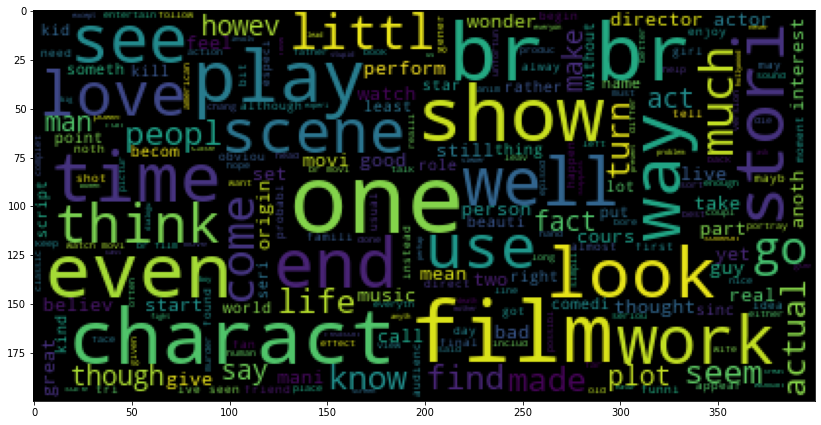

In [30]:
stopwords = set(STOPWORDS)
wordcl = WordCloud(stopwords = stopwords, max_font_size = 50, max_words = 5000).generate(text)
plt.figure(figsize=(14, 12))
plt.imshow(wordcl)
plt.show()

NLP的首要任務就是將文本內容做Tokenization（標識化）處理，也就是說我們將文本分割成一個小塊一個小塊的例如以一個英文單詞為單位或者一個漢字為單位，這樣子的操作主要是方便我們可以更集中的去分析文本資訊的內容和文本想表達的含義。當然分割是一個大範圍，不僅僅是文本分成不同的詞，也可以將整個文本分成段落，進而分成句子，句子在細分到詞。當然，我們一般所說的標識化就是將整句分割為單個識別字（tokens）。資料來源:https://www.cnblogs.com/jielongAI/p/10178585.html

---

tokenization就是通常所說的分詞，分出的每一個詞語我們把它稱為token。


---

在使用NLTK執行分詞之前，我們需要先安裝「punkt」部件。「punkt」包含了許多預訓練好的分詞模型。



In [31]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

每一文本字數

In [32]:
tweets_length = [ len(nltk.word_tokenize(x)) for x in df['review4'] ]
tweets_length

[171,
 90,
 88,
 72,
 130,
 58,
 76,
 84,
 66,
 19,
 55,
 86,
 235,
 56,
 27,
 72,
 54,
 128,
 65,
 65,
 183,
 84,
 30,
 165,
 73,
 66,
 286,
 72,
 58,
 366,
 251,
 219,
 58,
 378,
 119,
 184,
 40,
 172,
 58,
 139,
 61,
 123,
 92,
 144,
 88,
 114,
 46,
 73,
 375,
 64,
 241,
 326,
 96,
 42,
 112,
 113,
 110,
 95,
 307,
 230,
 73,
 82,
 45,
 23,
 110,
 155,
 194,
 68,
 107,
 164,
 119,
 138,
 130,
 90,
 162,
 71,
 174,
 293,
 80,
 153,
 82,
 77,
 142,
 229,
 35,
 67,
 150,
 72,
 114,
 207,
 86,
 89,
 208,
 101,
 74,
 142,
 102,
 75,
 94,
 278,
 76,
 386,
 73,
 206,
 93,
 117,
 51,
 156,
 99,
 57,
 76,
 100,
 21,
 58,
 143,
 66,
 168,
 45,
 43,
 149,
 58,
 87,
 124,
 86,
 75,
 61,
 241,
 69,
 90,
 76,
 105,
 232,
 77,
 65,
 109,
 208,
 57,
 141,
 147,
 149,
 236,
 160,
 265,
 49,
 138,
 147,
 115,
 171,
 63,
 149,
 96,
 97,
 103,
 113,
 100,
 48,
 450,
 80,
 72,
 56,
 27,
 107,
 31,
 297,
 206,
 34,
 64,
 120,
 51,
 189,
 130,
 81,
 320,
 217,
 139,
 148,
 130,
 459,
 109,
 121,
 68,
 63,

每一文本字數區分圖 -- 觀察此曲線圖,可以大約估計每一文本以150個英文字來計算

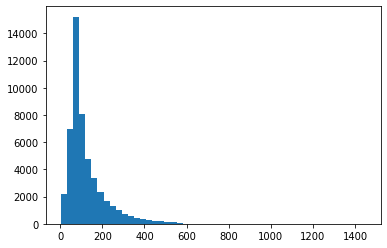

In [33]:
plt.figure()
plt.hist(tweets_length, bins =50)
plt.show()

拆分資料集(訓練集80% 測試集20%)

In [34]:
X = df['review4']
y = df['sentiment']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [35]:
X_train.shape

(40000,)

In [36]:
X_train

10560    way disast fellini work toward life line absur...
2513     funni eastmeetswest film influenc closur gm fl...
8863     im awar fan might like movi im awar idea searc...
20214    short nomin academi award lose anna bella sinc...
2048     alway love muppet though children entertain wa...
                               ...                        
11173    got back european premier gamer dork risingbr ...
19624    love life explor cultur relev scenario marriag...
29154    riget ii good sequel quit good first one seri ...
25195    oh dear disappoint movi ripoff japan ringu wel...
28488    ye movi bad what wors take advantag whatsoev t...
Name: review4, Length: 40000, dtype: object

再次確定每條文本轉換成一個字符串

In [37]:
training_sentences = []
training_labels = []
testing_sentences = []
testing_labels = []
for row in X_train:
    training_sentences.append(str(row))
for row in y_train:
    training_labels.append(row)
for row in X_test:
    testing_sentences.append(str(row))
for row in y_test:
    testing_labels.append(row)


In [38]:
training_sentences

['way disast fellini work toward life line absurd masterpiec free associ bullshit small categori film ultim fit often depend person feel said casanova left cold admir set littl cannot sum adequ bukowski br br casanova die old guy big cock long tongu gut say live well true say could spit grave without feel also true ladi usual go biggest fool find human race stand today bred clever last casanova hollow insid like easter bunni foster upon poor children br br far could make posit fellini take regard subject grant empathi disgust nonethelessbr br casanova environ made decay incestu behavior theme fellini dealt pointedli satyricon success plot characterist soft porn without coher donald sutherland ugli slimi point distractionbr br yet might point portray casanova unsightli fool challeng anybodi formul point without obviou fellini couldnt ever seem like dirti old man maestro sure one whose impuls satisfi anybodi els find hard imagin audienc enjoy film stori worth tell',
 'funni eastmeetswest

In [39]:
training_labels

[0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,


文本進行標記

---


Tokenizer 函數 在默認情況下，它會刪除所有標點符號並將文本設置為以空格分隔的組織形式。每個單詞通過分詞器功能變成一個整數。

---

oov_token 的值被設置為“OOV”。這意味著任何未知的單詞都將被 oov_token 替換。這是一個更好的選擇，而不是扔掉未知的單詞。


In [40]:
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(oov_token="<OOV>")

全部字數預設為10000

In [41]:
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

每個單詞如何有一個整數值

In [42]:
print(word_index)

{'<OOV>': 1, 'br': 2, 'movi': 3, 'film': 4, 'one': 5, 'like': 6, 'time': 7, 'good': 8, 'make': 9, 'see': 10, 'get': 11, 'watch': 12, 'charact': 13, 'even': 14, 'stori': 15, 'would': 16, 'realli': 17, 'scene': 18, 'look': 19, 'well': 20, 'show': 21, 'much': 22, 'end': 23, 'peopl': 24, 'great': 25, 'also': 26, 'love': 27, 'bad': 28, 'go': 29, 'think': 30, 'first': 31, 'play': 32, 'dont': 33, 'act': 34, 'way': 35, 'thing': 36, 'made': 37, 'could': 38, 'know': 39, 'say': 40, 'seem': 41, 'mani': 42, 'plot': 43, 'work': 44, 'want': 45, 'actor': 46, 'seen': 47, 'come': 48, 'take': 49, 'two': 50, 'never': 51, 'tri': 52, 'best': 53, 'littl': 54, 'year': 55, 'life': 56, 'ever': 57, 'give': 58, 'better': 59, 'man': 60, 'still': 61, 'find': 62, 'perform': 63, 'feel': 64, 'use': 65, 'part': 66, 'actual': 67, 'someth': 68, 'im': 69, 'lot': 70, 'back': 71, 'interest': 72, 'director': 73, 'real': 74, 'guy': 75, 'didnt': 76, 'doesnt': 77, 'anoth': 78, 'though': 79, 'cast': 80, 'live': 81, 'funni': 82, 

文本句子可以表示為一個單詞序列


---
句子轉換為單詞序列，然後在必要時進行padding


---

每一文本以150個英文字來計算


In [43]:
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen=150, truncating='post')
testing_sentences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sentences, maxlen=150)

In [44]:
print(len(sequences))

40000


In [45]:
training_sentences

['way disast fellini work toward life line absurd masterpiec free associ bullshit small categori film ultim fit often depend person feel said casanova left cold admir set littl cannot sum adequ bukowski br br casanova die old guy big cock long tongu gut say live well true say could spit grave without feel also true ladi usual go biggest fool find human race stand today bred clever last casanova hollow insid like easter bunni foster upon poor children br br far could make posit fellini take regard subject grant empathi disgust nonethelessbr br casanova environ made decay incestu behavior theme fellini dealt pointedli satyricon success plot characterist soft porn without coher donald sutherland ugli slimi point distractionbr br yet might point portray casanova unsightli fool challeng anybodi formul point without obviou fellini couldnt ever seem like dirti old man maestro sure one whose impuls satisfi anybodi els find hard imagin audienc enjoy film stori worth tell',
 'funni eastmeetswest

In [46]:
sequences

[[35,
  1445,
  6330,
  44,
  611,
  56,
  129,
  1381,
  783,
  865,
  1718,
  9090,
  354,
  2025,
  4,
  757,
  638,
  347,
  1792,
  133,
  64,
  234,
  1,
  249,
  1046,
  1190,
  95,
  54,
  504,
  1637,
  2787,
  1,
  2,
  2,
  1,
  274,
  88,
  75,
  119,
  8644,
  125,
  3096,
  2252,
  40,
  81,
  20,
  222,
  40,
  38,
  3491,
  1946,
  130,
  64,
  26,
  222,
  548,
  278,
  29,
  1025,
  1378,
  62,
  235,
  1038,
  424,
  437,
  1,
  919,
  149,
  1,
  3416,
  852,
  6,
  1,
  3823,
  2627,
  610,
  276,
  360,
  2,
  2,
  158,
  38,
  9,
  662,
  6330,
  49,
  1088,
  554,
  1243,
  4672,
  1392,
  1,
  2,
  1,
  2136,
  37,
  6062,
  5804,
  1585,
  468,
  6330,
  2788,
  1,
  1,
  427,
  43,
  3678,
  1989,
  1425,
  130,
  2847,
  2275,
  2538,
  1355,
  4826,
  93,
  1,
  2,
  179,
  162,
  93,
  294,
  1,
  1,
  1378,
  1217,
  1560,
  1,
  93,
  130,
  550,
  6330,
  362,
  57,
  41,
  6,
  1475,
  88,
  60,
  1,
  153,
  5,
  576,
  5951,
  1308,
  1560,
  277,
  

建立模型(Sequential)


---
使用 10,000 個唯一詞來訓練網絡


---
Embedding dimension 16表示每個單詞將由一個16維向量表示


---
每一文本以150個英文字來計算


---



激勵函數 relu sigmoid ...






In [47]:
model = tf.keras.Sequential([                             
    tf.keras.layers.Embedding(10000, 16, input_length=150), 
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

設定模型訓練方式


---
metrics 評估準確率方法



In [48]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 16)           160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 6)                 102       
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 160,109
Trainable params: 160,109
Non-trainable params: 0
_________________________________________________________________


標籤label轉換為數組array

In [50]:
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [51]:
training_labels

[0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,


In [52]:
training_labels_final

array([0, 1, 0, ..., 1, 0, 0])

fit 方法,可以進行模組訓練


---
padded 訓練集/
training_labels_final 訓練標籤/
testing_padded 測試集/
testing_labels_final 測試標籤


---


epochs 訓練次數



In [53]:
history = model.fit(padded, training_labels_final, epochs=10, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
1250/1250 [==============================] - 8s 5ms/step - loss: 0.4603 - accuracy: 0.8118 - val_loss: 0.2975 - val_accuracy: 0.8801
Epoch 2/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.2648 - accuracy: 0.8954 - val_loss: 0.2693 - val_accuracy: 0.8893
Epoch 3/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.2268 - accuracy: 0.9110 - val_loss: 0.2645 - val_accuracy: 0.8913
Epoch 4/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.2033 - accuracy: 0.9219 - val_loss: 0.2691 - val_accuracy: 0.8884
Epoch 5/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.1867 - accuracy: 0.9291 - val_loss: 0.2786 - val_accuracy: 0.8876
Epoch 6/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.1727 - accuracy: 0.9358 - val_loss: 0.2904 - val_accuracy: 0.8852
Epoch 7/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.1615 - accuracy: 0.9409 - val_loss: 0.3044 - val_accuracy:

訓練準確率為 95.34%，驗證準確率為 87.65 看起來有點過擬合。

繪製訓練和驗證準確度，以及訓練和驗證損失

<Figure size 432x288 with 0 Axes>

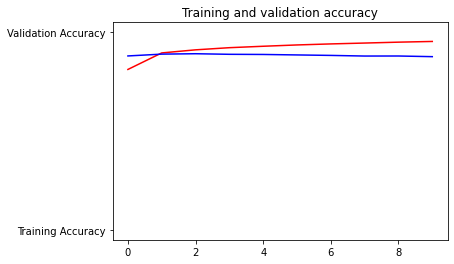

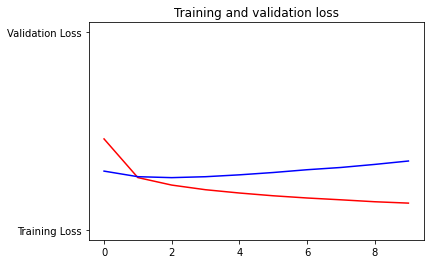

<Figure size 432x288 with 0 Axes>

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs=range(len(acc))
plt.plot(epochs, acc, 'r', 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', 'Validation Accuracy')
plt.title('Training and validation accuracy')
plt.figure()
plt.plot(epochs, loss, 'r', 'Training Loss')
plt.plot(epochs, val_loss, 'b', 'Validation Loss')
plt.title('Training and validation loss')
plt.figure()